<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [ ]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_lfw_people

# Cargar datos
lfw_people = fetch_lfw_people(data_home="data", min_faces_per_person=25)
n_samples, h, w = lfw_people.images.shape
names = pd.DataFrame(lfw_people.target_names)
X = lfw_people.data
y = lfw_people.target
img = lfw_people.images

X = pd.DataFrame(X)
y = pd.DataFrame(y, columns=['id'])

df = y.join(X)
df = df.merge(names, left_on='id', right_index=True)
df = df.rename(columns={'0_x':'0', '0_y': 'Nombre'})
df.insert(1, 'Nombre', df.pop('Nombre'))
df.head()

: 

In [ ]:
lfw_people.DESCR

Se utilizó la librería sklearn.datasets para cargar la base de datos Labeled Faces in the Wild (LFW) para la clasificación de imágenes de personas. En el código se incluyeron dos opciones: en primer lugar la opción min_faces_per_person para cumplir con el requisito de que los individuos tengan al menos 25 imágenes y la opción data_home para determinar la carpeta donde se va a descargar el dataset. Una vez cargada la base de datos, se utilizó la función DESCR con el fin de obtener la documentación respectiva.

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [2]:
display(X.describe())
print(f'Las imágenes son de dimensión {h} x {w} = {h*w} pixeles')
print(f'La base es de dimensión {X.shape}')

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
count,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,...,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000
mean,0.336255,0.348044,0.368863,0.397863,0.430490,0.460623,0.488696,0.513982,0.535845,0.553825,...,0.424477,0.447436,0.468799,0.483274,0.485128,0.476795,0.465106,0.450122,0.428922,0.407338
std,0.195378,0.193605,0.192413,0.192568,0.192140,0.190652,0.183987,0.177616,0.172934,0.168389,...,0.229585,0.245664,0.259987,0.272403,0.279844,0.286842,0.292182,0.295330,0.294330,0.294796
min,0.000000,0.000000,0.000000,0.002614,0.002614,0.005229,0.007843,0.005229,0.011765,0.024837,...,0.003922,0.001307,0.003922,0.002614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.186928,0.201307,0.220915,0.255882,0.304575,0.338235,0.372549,0.405229,0.430065,0.456209,...,0.258824,0.267974,0.272876,0.262745,0.252288,0.232353,0.198693,0.177778,0.164379,0.145098
50%,0.313726,0.333987,0.364706,0.397386,0.433987,0.471895,0.498039,0.522876,0.545098,0.564706,...,0.398693,0.419608,0.441830,0.451634,0.458824,0.456209,0.436601,0.409804,0.379085,0.340523
75%,0.460131,0.471895,0.496732,0.526797,0.559477,0.590850,0.611765,0.633987,0.649673,0.667974,...,0.559804,0.606536,0.646078,0.699673,0.717647,0.717647,0.717647,0.699673,0.673203,0.658824
max,0.997386,0.997386,0.996078,0.994771,0.993464,0.993464,0.996078,0.998693,0.990850,0.992157,...,0.993464,1.000000,0.998693,0.998693,1.000000,1.000000,1.000000,1.000000,0.998693,1.000000


Las imágenes son de dimensión 62 x 47 = 2914 pixeles
La base es de dimensión (2588, 2914)


Para determinar el tamaño de la base de datos, esta fue llevada a un data frame de pandas "aplastando los datos". La base de datos resultante cuenta con un total de 2588 filas y 2914 columnas, donde las columnas corresponden a los píxeles ya que las imágenes son de dimensión 62x47.

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

<Axes: title={'center': 'Histograma de frecuencia de caras'}, xlabel='Nombre'>

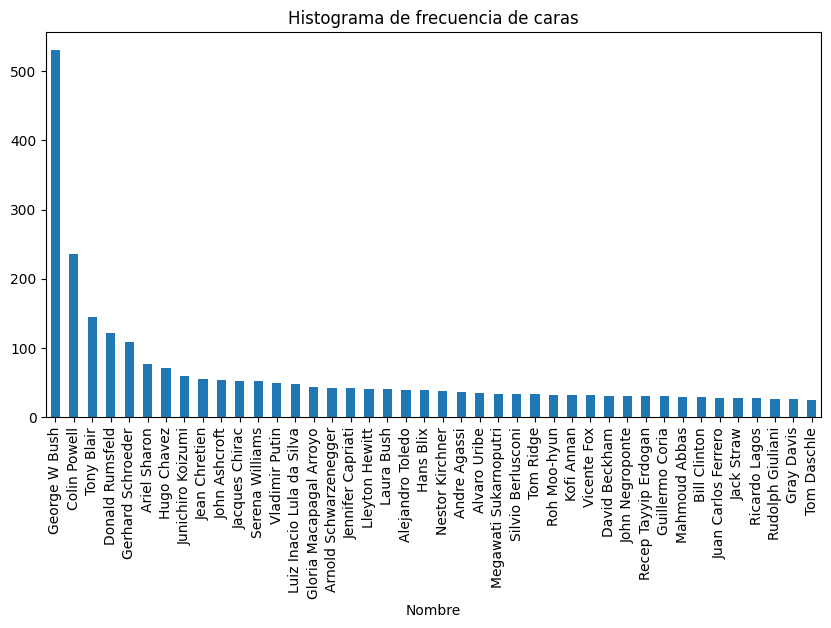

In [5]:
# Histograma de caras
face_hist = df['Nombre'].value_counts()
face_hist.plot(kind='bar', figsize=(10, 5), title='Histograma de frecuencia de caras')

La distribución del número de imágenes por persona es altamente asimétrica. En una alta propoción de los casos el número de imágenes es cercano al umbral de 25 y en la mayor parte se encuentra por debajo de 100. Solamente en 5 casos el número de imágenes está por encima de 100. Estos son George W Bush, Colin Powell, Tony Blair, Donald Rumsfeld y Gerhard Schroeder. Para el caso de George W Bush alcanza el número máximo de imágenes que está por encima de 500.

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Existen 52 imágenes de Serena Williams


IndexError: single positional indexer is out-of-bounds

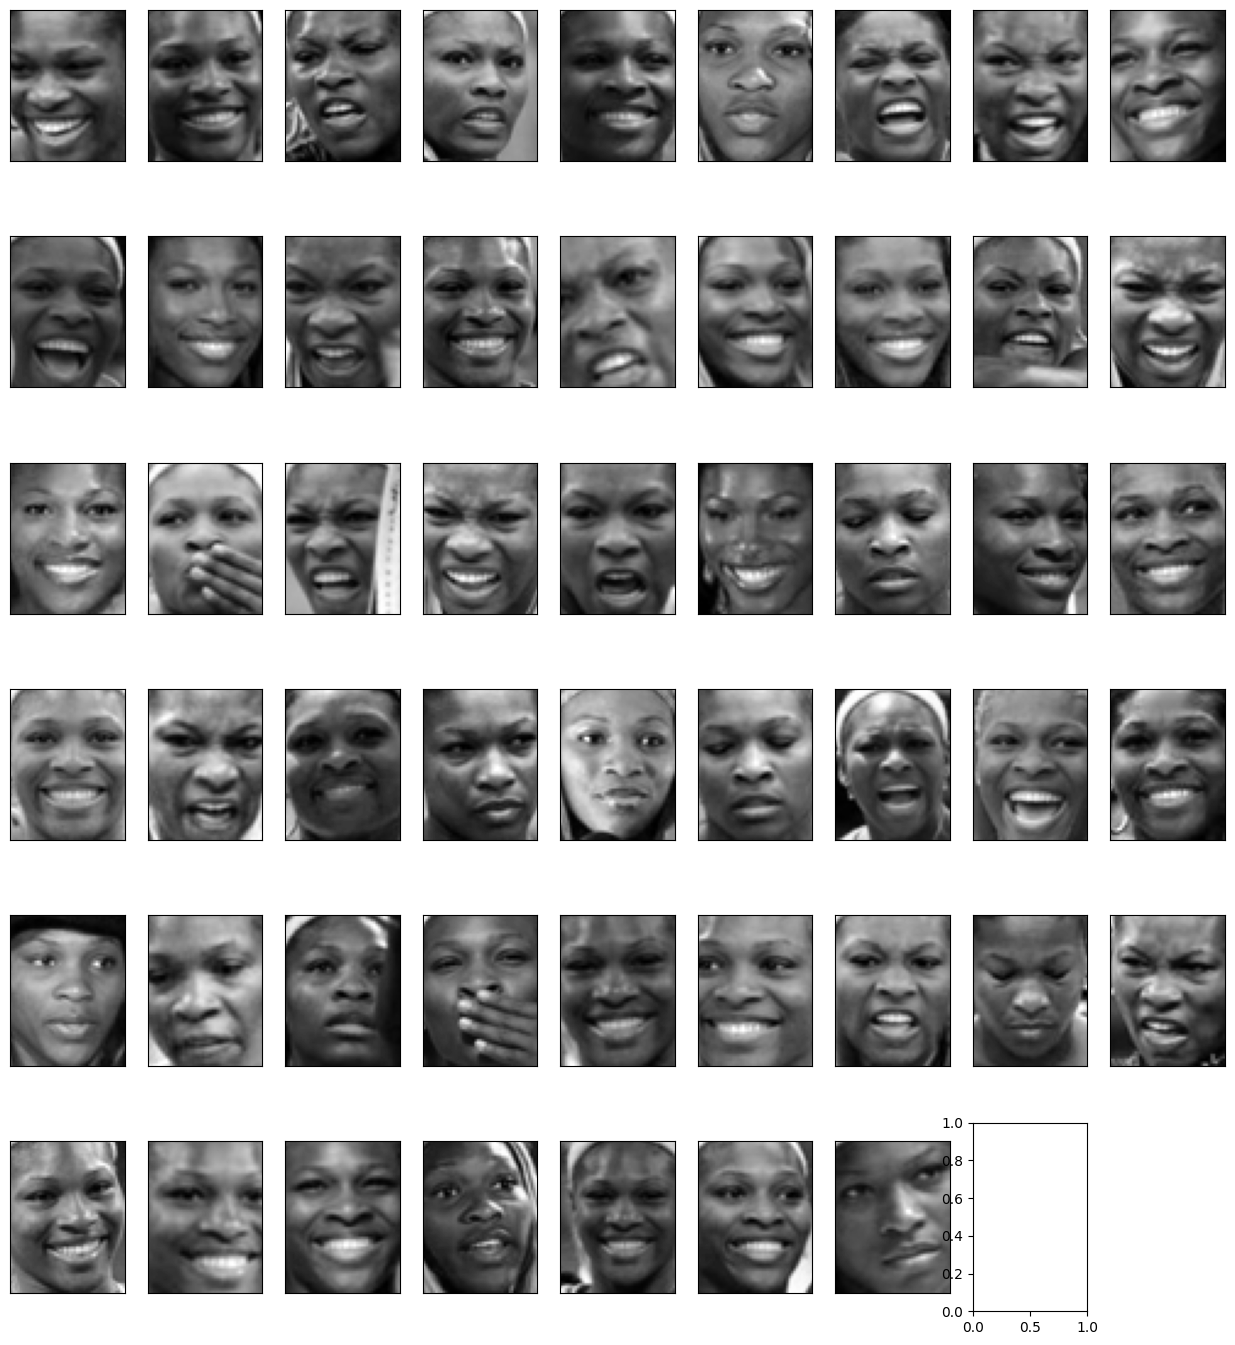

In [ ]:
# Filtrar la cara solicitada
query_name = 'Serena Williams'
face = df[df['Nombre']==query_name]
face = face.drop(['id', 'Nombre'], axis=1)
print(f'Existen {face.shape[0]} imágenes de {query_name}')

# Visualizar las imágenes
n_row = 6
n_col = 9
plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(face.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

Para hacer este procedimiento, en primer lugarse utiliza la sintaxis de la df de pandas para filtrar solamente las imágenes que estén etiquetadas con la etiqueta de Serena Williams. A continuación, se crea una figura que presentará en forma matricial las imágenes correspondientes las cuales son llamadas a través de un bucle que hace uso de los píxeles contenidos en el df.

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

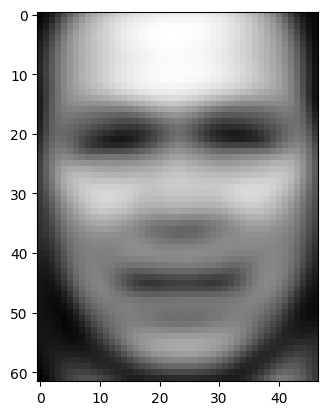

In [15]:
# Calcular rostro promedio
avg_face = df.drop(['id','Nombre'], axis=1).mean(axis=0)
# Pintar la cara promedio
plt.imshow(avg_face.to_numpy().reshape((h, w)), cmap=plt.cm.gray)

Para calcular el rostro promedio se eliminan las columnas correspondientes a los identificadores con el fin de conservar solamente los píxeles. Así se aplica un promedio a cada una de las columnas generando de esta manera una imágen en la cual cada píxel es el promedio de los píxeles de todos los rostros de la base de datos. El resultado es graficado utilizando la función imshow.

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

IndexError: single positional indexer is out-of-bounds

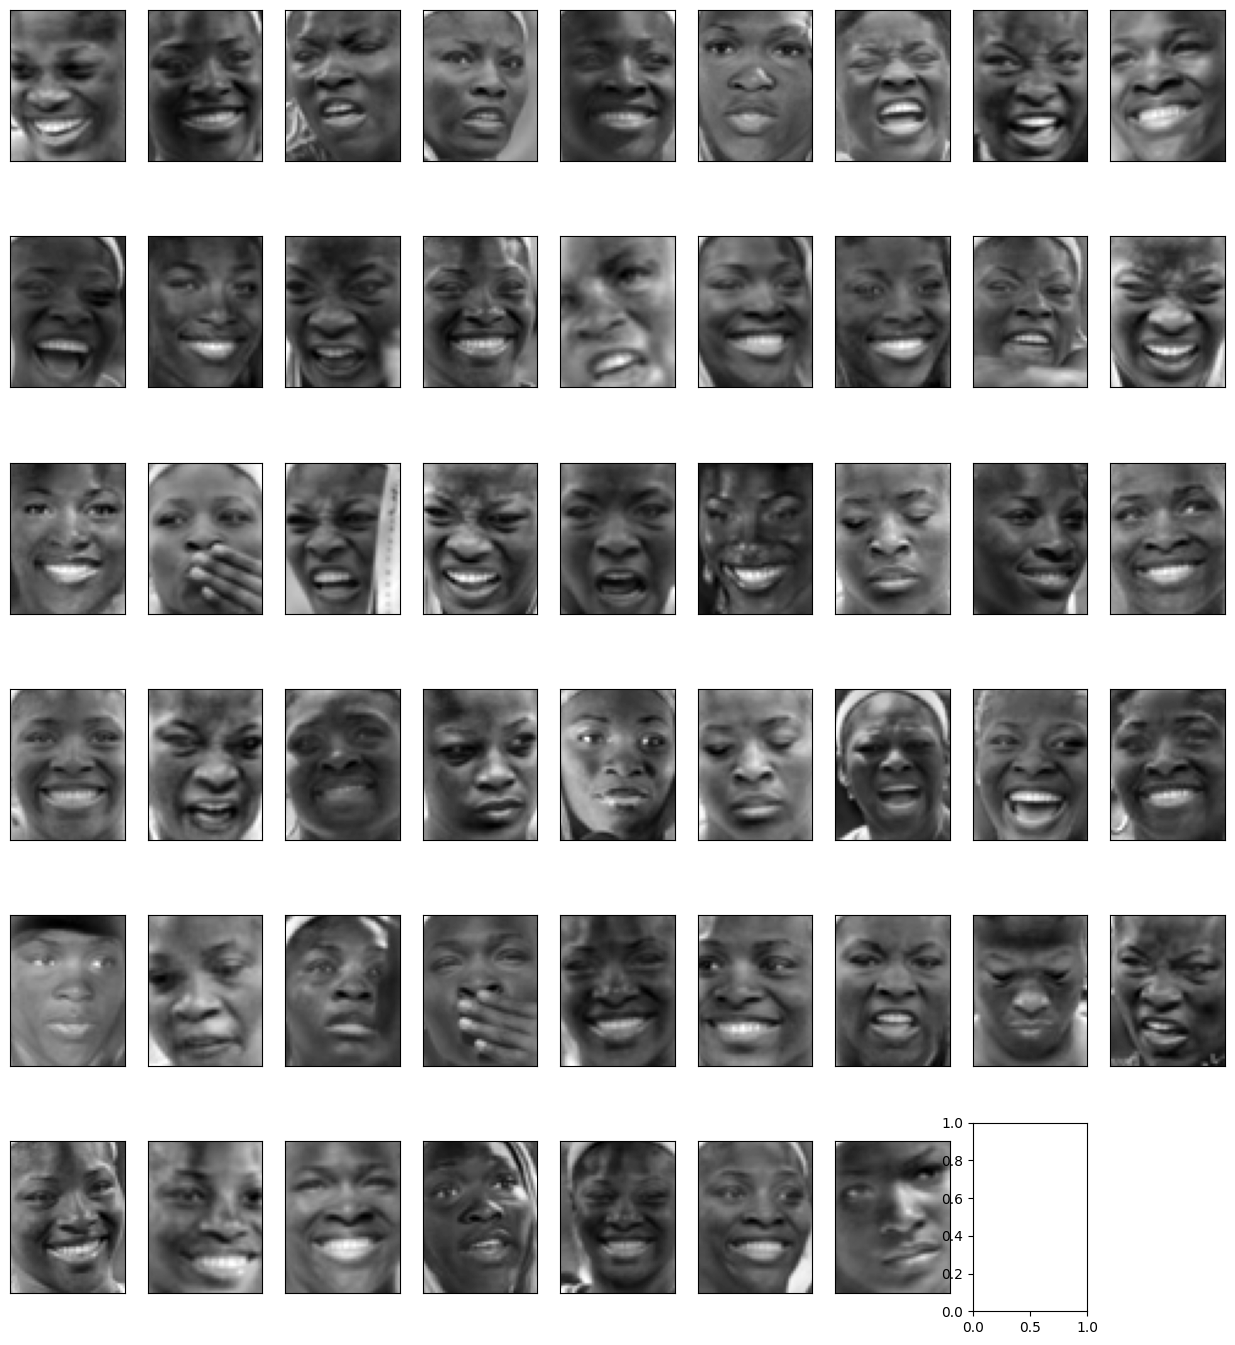

In [ ]:
# Utilice este espacio para escribir el código.
df_not_avg = df.drop(['id','Nombre'], axis=1)-avg_face
serena = df[df['Nombre']=='Serena Williams']
not_avg_face = serena.drop(['id','Nombre'], axis=1)-avg_face

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(not_avg_face.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

En primer lugar se tomó la base de datos original y a cada una de las columnas se le restó su valor promedio, generando así el df llamado df_not_avg. Si bien de aquí se podrían extraer las imágenes modificadas de Serena Williams para hacer más explícito el proceso se filtró la base de datos original solo con las columnas correspondientes, se restó el promedio y las imágenes fueron graficadas en una matriz.

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

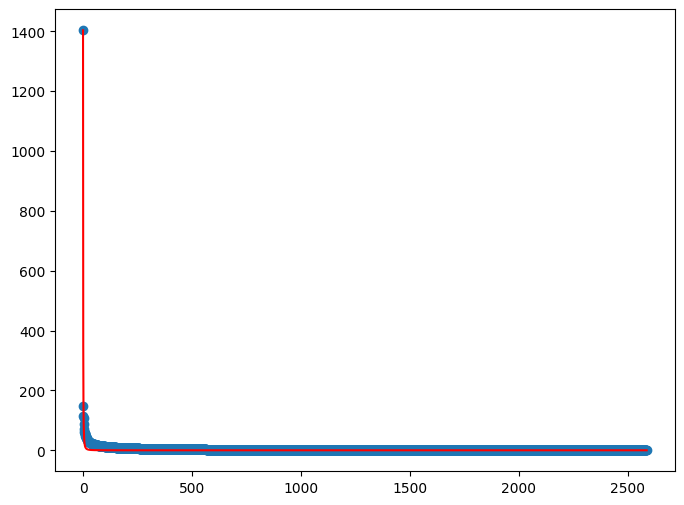

In [24]:
# Utilice este espacio para escribir el código.
from scipy.linalg import svd
U,S,Vt = svd(X)

idx = range(len(S))
func = [S[0]/((i+1) ** 2) for i in idx ]

plt.figure(figsize = (8, 6))
plt.plot(idx, func, color = 'r')
plt.scatter(idx, S)

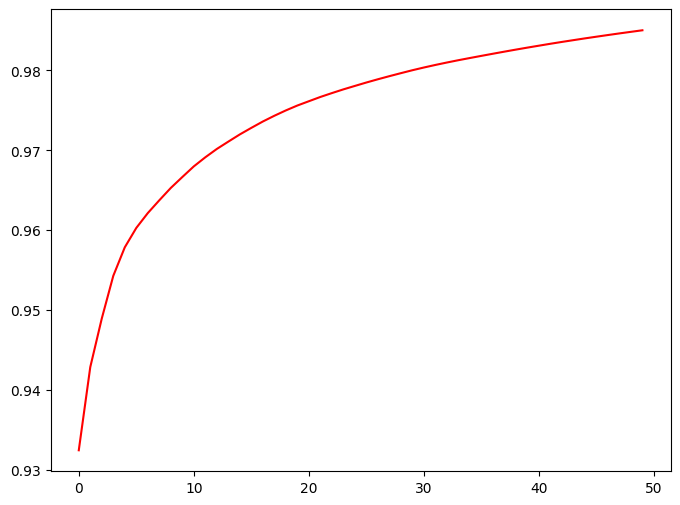

In [ ]:
rg =1000
idx = range(0,rg)
var_explained = np.round(S**2/np.sum(S**2), decimals=6)

cumsum=var_explained[0:rg].cumsum()

plt.figure(figsize = (8, 6))
plt.plot(idx,cumsum , color = 'r')

In [ ]:
sum(var_explained[0:rg])

0.9850339968688786

Para calcular la descomposición en valores singulares se utilizó la función svd de las operaciones matriciales de scipy.linalg. Con la matriz S se obtuvieron los valores singulares y diviendo cada uno de ellos al cuadrado entre la suma total de cuadrados  se obtuvo la proporción explicada en cada caso. Después el valor de K=1000 fue almacenado en el objeto rg. Con este número se construyó una suma acumulada con el fin de observar como aumenta la proporción explicada conforme se van aumentando el número de valores singulares. Con estos 1000 valores se explica el 99.9% de la varianza total.

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,0.267352,0.272867,0.287599,0.314486,0.344107,0.371981,0.396151,0.416333,0.431790,0.447865,...,0.309728,0.292511,0.270955,0.244812,0.213456,0.179637,0.153904,0.135024,0.135790,0.148018
1,0.144400,0.167928,0.201431,0.239392,0.263986,0.281312,0.309567,0.340697,0.364572,0.388086,...,0.726394,0.800554,0.876694,0.929705,0.935508,0.897647,0.840857,0.763092,0.671126,0.589785
2,0.398028,0.439305,0.496649,0.550685,0.579257,0.595072,0.611470,0.632588,0.652019,0.663729,...,0.686090,0.684844,0.659023,0.596070,0.475110,0.320088,0.180418,0.067615,-0.024081,-0.070274
3,0.437699,0.465432,0.505601,0.561147,0.622325,0.677319,0.721423,0.761462,0.795522,0.817283,...,0.266496,0.310098,0.348058,0.375116,0.404623,0.424323,0.432784,0.429484,0.404171,0.367552
4,0.284623,0.300649,0.331819,0.374106,0.405602,0.427471,0.450087,0.476639,0.499951,0.514177,...,0.272203,0.250760,0.224261,0.188884,0.135324,0.068591,0.015310,-0.031399,-0.060472,-0.061801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,0.409979,0.408623,0.421412,0.453178,0.491615,0.525783,0.551492,0.568194,0.579258,0.590262,...,0.356079,0.377328,0.387309,0.388051,0.384638,0.378906,0.377362,0.365706,0.358317,0.355101
2584,0.375855,0.391935,0.417945,0.457780,0.501768,0.539588,0.565041,0.580764,0.591062,0.606571,...,0.423903,0.456542,0.471261,0.458978,0.425089,0.383378,0.343501,0.305006,0.269793,0.243123
2585,0.311490,0.320558,0.332287,0.355478,0.395333,0.432789,0.462193,0.486292,0.507317,0.525819,...,0.118135,0.155844,0.203737,0.255410,0.313384,0.377233,0.428790,0.467728,0.471121,0.449083
2586,0.162483,0.163234,0.182088,0.219090,0.267887,0.315231,0.361297,0.399275,0.430905,0.457483,...,0.786163,0.872034,0.938189,0.975970,0.989246,0.976938,0.951747,0.898749,0.824844,0.755483


,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
89,0.171293,0.176144,0.187243,0.210751,0.246176,0.281956,0.312524,0.339413,0.361902,0.378316,...,0.123776,0.135026,0.148835,0.166580,0.198889,0.233751,0.262244,0.282534,0.290010,0.285585
205,0.316443,0.326688,0.340201,0.356433,0.374831,0.394105,0.409711,0.420996,0.431110,0.441702,...,0.295866,0.319943,0.341089,0.355871,0.361598,0.359684,0.352965,0.344416,0.339820,0.328313
238,0.378986,0.369770,0.363889,0.364195,0.378991,0.396909,0.407378,0.413814,0.421925,0.422843,...,-0.093608,-0.127913,-0.155045,-0.157485,-0.130863,-0.080213,-0.020290,0.046251,0.109954,0.156222
310,0.427126,0.436124,0.447592,0.462353,0.485776,0.510691,0.525532,0.528875,0.531789,0.543334,...,0.478932,0.531227,0.569751,0.587178,0.581728,0.569411,0.551778,0.533166,0.516013,0.489534
383,0.245557,0.252491,0.258730,0.266426,0.277762,0.292033,0.306162,0.316804,0.325546,0.338937,...,0.277899,0.292989,0.314918,0.337885,0.353599,0.363453,0.366127,0.367541,0.374290,0.370296


IndexError: single positional indexer is out-of-bounds

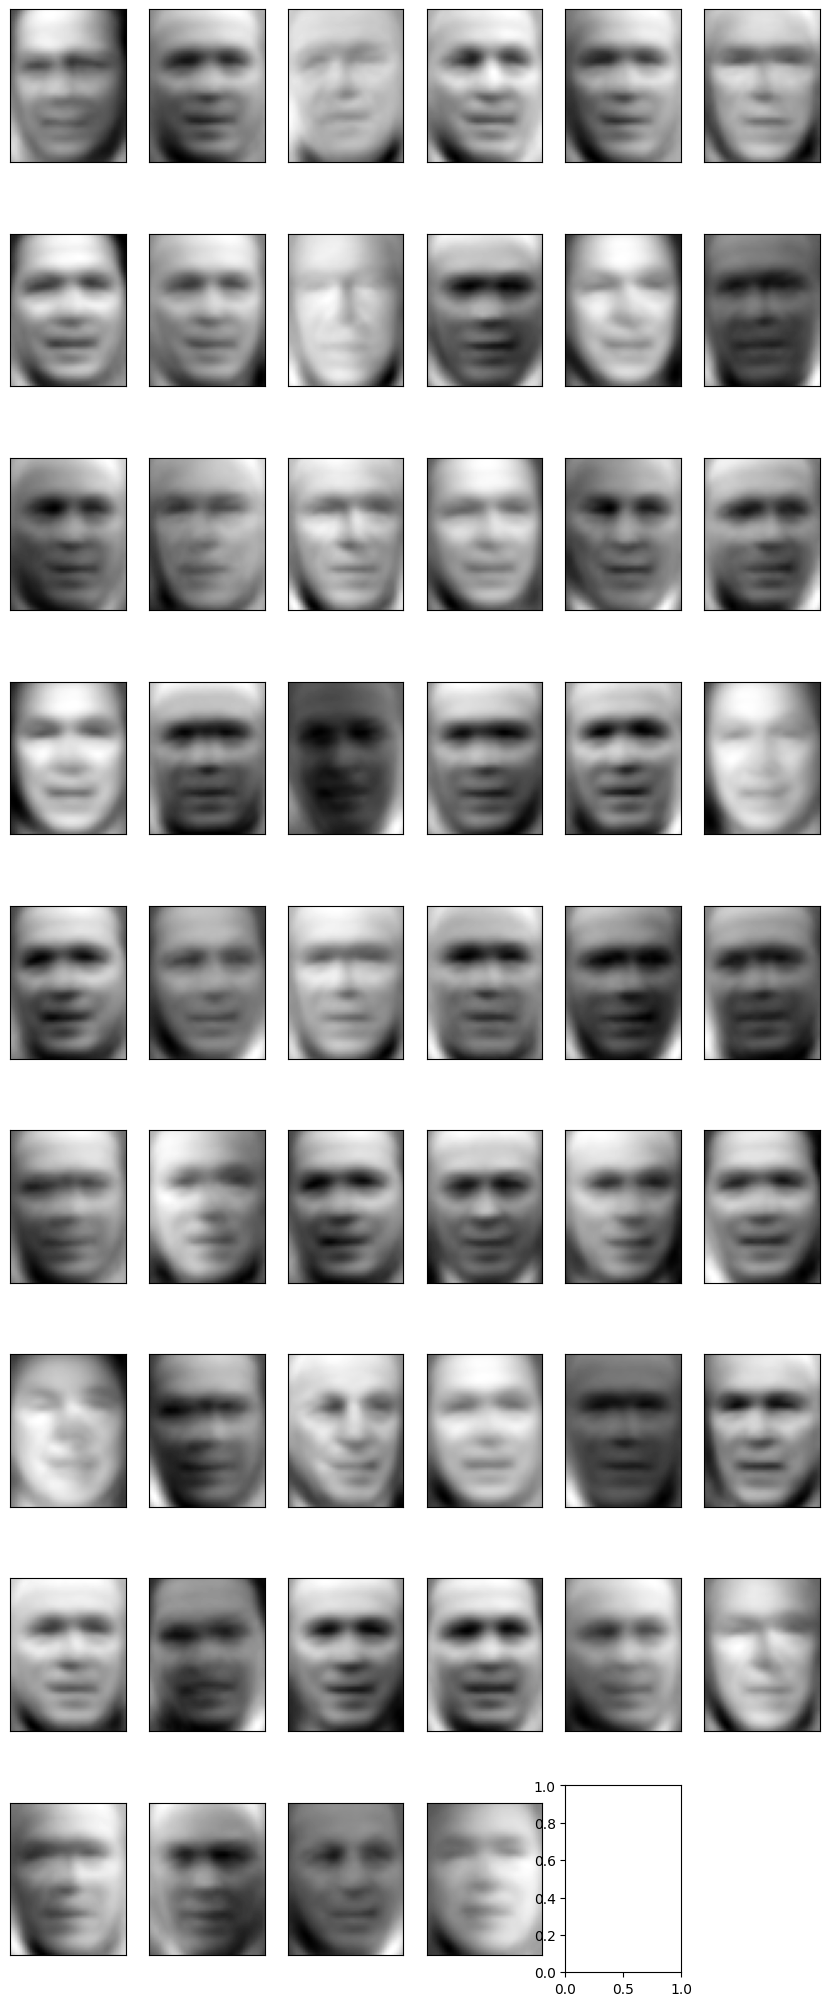

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [ ]:
n,k=X .shape

S2= np.resize(S,[n,1])*np.eye(n,k) #ponemos los valores singulares en una matriz diagonal

l = 1000

reconstructed=np.dot(U[:,0:l],np.dot(S2[0:l,0:l],Vt[0:l,:]))
reconstructed = pd.DataFrame(reconstructed)
reconstructed

In [ ]:
serena=df.loc[df['Nombre'] == 'Serena Williams'].index
imag_serena=reconstructed.iloc[serena]

imag_serena.head()

In [ ]:
n_row=9
n_col=6

plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(imag_serena.iloc[i].to_numpy().reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

Para verificar que se puede reconstruir el df original a través de los valores singulares se utiliza la matriz de dimensión reducida y la matriz de rostro promedio para generar el objeto reconstructed. A continuación este objeto es filtrado para conservar solamente las imágenes de Serena Williams y se realiza el gráfico en donde se evidencia que las imágenes sí fueron reconstruidas. 

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [ ]:
df['Bush'] = df['Nombre'].apply(lambda nombre: 1 if nombre == 'George W Bush' else 0)

In [ ]:
df.head()

En este código, estamos usando la función apply() en la columna 'Nombre'. La función lambda verifica si el nombre es igual a "George W Bush" y devuelve 1 en ese caso, de lo contrario, devuelve 0. El resultado se almacena en una nueva columna llamada '"Bush"

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Bush', 'id', 'Nombre'])
y = df['Bush']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10101)

El código utilizado crea una matriz X que elimina las columnas Bush, id y Nombre con el fin de conservar solamente la información de los píxeles. Esta matriz se utilizará como predictora. En el objeto y se almacena el vector binario que define si la imagen corresponde o no a George W Bush. A continuación se dividen X e y en datos de prueba y en datos de entrenamiento utilizando la función train_test_split. Se el asigna el random_state=10101 con el fin de preservar la replicabilidad y se usa una asignación del 20% a los datos de prueba.

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [ ]:
from sklearn.linear_model import LogisticRegression

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)

# Utilice este espacio para escribir el código restante.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).